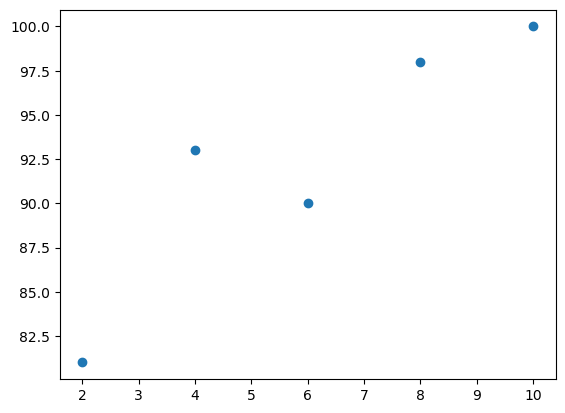

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = [[2], [4], [6], [8], [10]]
y = [[81], [93], [90], [98], [100]]

plt.scatter(x, y)
plt.show()

In [3]:
model = LinearRegression()
model.fit(x, y)

result = model.predict([[7]])
print(f"estimate score : {result}")

estimate score : [[94.55]]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


temp = pd.read_excel('./data/(2010-2020) weather.xlsx')
temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [13]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [15]:
temp.describe()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,4018,4018.0,4018.000000,4018.000000,4017.000000
mean,2015-07-02 12:00:00,108.0,12.965207,8.991015,17.699627
min,2010-01-01 00:00:00,108.0,-14.800000,-18.000000,-10.700000
25%,2012-10-01 06:00:00,108.0,3.700000,-0.300000,8.200000
50%,2015-07-02 12:00:00,108.0,14.250000,9.800000,19.600000
75%,2018-04-01 18:00:00,108.0,22.800000,18.900000,27.400000
max,2020-12-31 00:00:00,108.0,33.700000,30.300000,39.600000
std,NaN,0.0,10.803691,10.932678,10.976719


In [19]:
temp.drop('지점', axis=1, inplace=True)
temp.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [27]:
temp.columns = ['날짜', '평균기온', '최저기온', '최고기온']
temp.head()

,날짜,평균기온,최저기온,최고기온
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [29]:
temp.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

* 최고기온 결측치 1개 존재

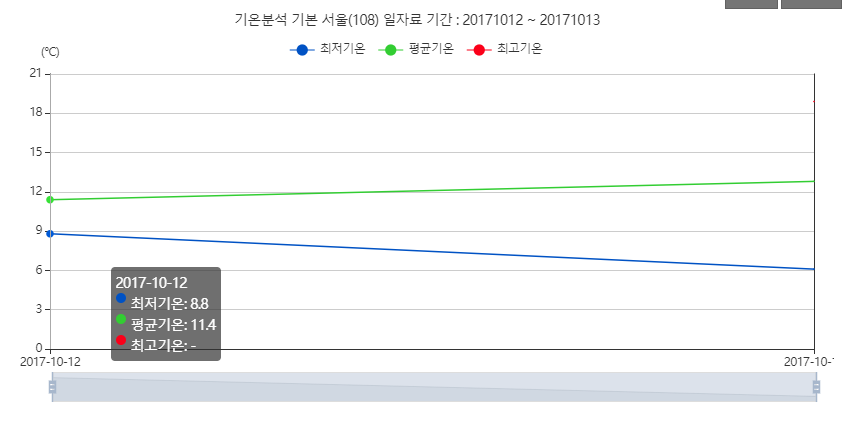

* 기상청 홈페이지에서 해당 데이터를 찾아보니, null 값임을 확인할 수 있었다.
* 1개이고 다른 기온으로 대체하여 넣을 수 없기 때문에 삭제를 진행한다.

In [38]:
temp[temp['최고기온'].isna()]

,날짜,평균기온,최저기온,최고기온
2841,2017-10-12,11.4,8.8,NaN


In [42]:
temp.dropna(subset=["최고기온"], axis=0, inplace=True)
temp.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [48]:
temp['연도'] = temp['날짜'].dt.year
temp

,날짜,평균기온,최저기온,최고기온,연도
0,2010-01-01,-7.6,-12.7,-3.6,2010
1,2010-01-02,-3.6,-7.4,0.2,2010
2,2010-01-03,-6.8,-10.5,-3.2,2010
3,2010-01-04,-5.9,-8.0,-3.4,2010
4,2010-01-05,-9.9,-12.3,-7.0,2010
...,...,...,...,...,...
4013,2020-12-27,5.8,1.4,10.0,2020
4014,2020-12-28,6.7,4.2,11.4,2020
4015,2020-12-29,0.1,-6.2,4.3,2020
4016,2020-12-30,-10.9,-12.9,-6.2,2020


In [52]:
conditions = (temp['날짜'].dt.month == 8) & (temp['날짜'].dt.day == 15)
temp0815 = temp[condition]
temp0815

,날짜,평균기온,최저기온,최고기온,연도
226,2010-08-15,26.6,24.6,30.2,2010
591,2011-08-15,24.5,22.9,26.9,2011
957,2012-08-15,23.7,22.4,27.1,2012
1322,2013-08-15,28.7,25.8,32.4,2013
1687,2014-08-15,24.9,20.9,29.6,2014
2052,2015-08-15,27.1,23.1,30.8,2015
2418,2016-08-15,29.1,25.8,34.0,2016
2783,2017-08-15,21.9,20.8,24.0,2017
3148,2018-08-15,31.7,28.3,38.0,2018
3513,2019-08-15,25.9,23.9,28.6,2019


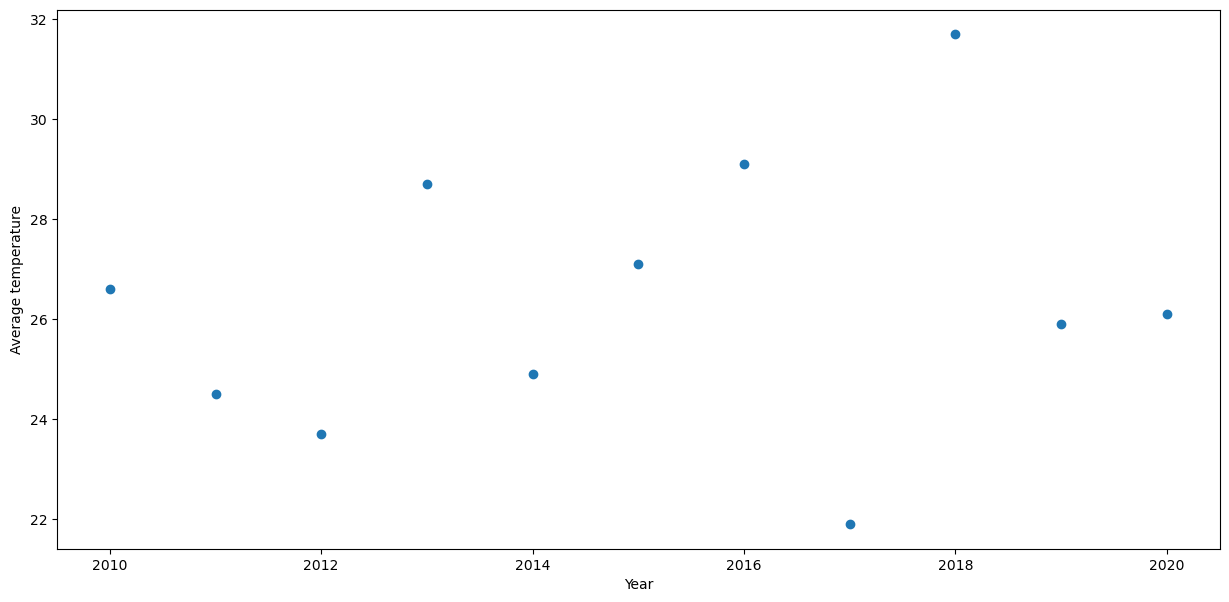

In [54]:
fig = plt.figure(figsize=(15, 7))
X = temp0815[['연도']]
y = temp0815['평균기온']
plt.xlabel("Year")
plt.ylabel('Average temperature')
plt.scatter(X, y)
plt.show()

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = temp0815[['연도']]
y = temp0815['평균기온']
model.fit(X, y)
result = model.predict([[2022]])
print(result)

[27.50818182]


C:\Users\hjoon\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


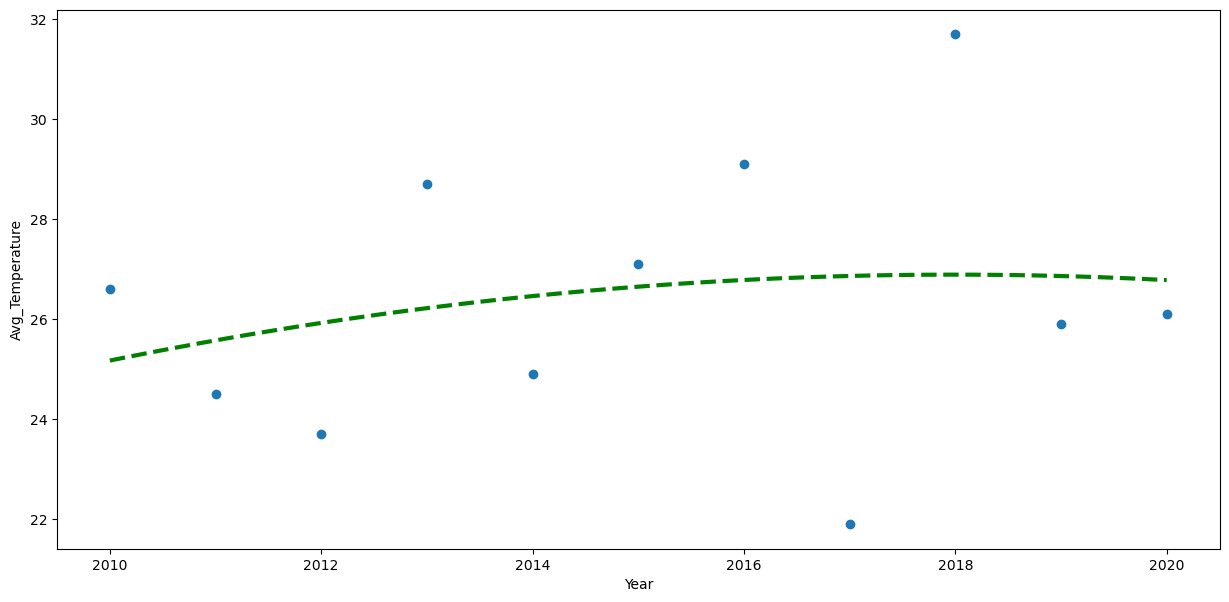

In [80]:
X = temp0815['연도']
y = temp0815['평균기온']

fp1 = np.polyfit(X, y, 2)
f1 = np.poly1d(fp1)
fx = np.linspace(2010, 2020)
plt.figure(figsize=(15, 7))
plt.scatter(X, y)
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color = 'g')
plt.xlabel("Year")
plt.ylabel("Avg_Temperature")
plt.show()

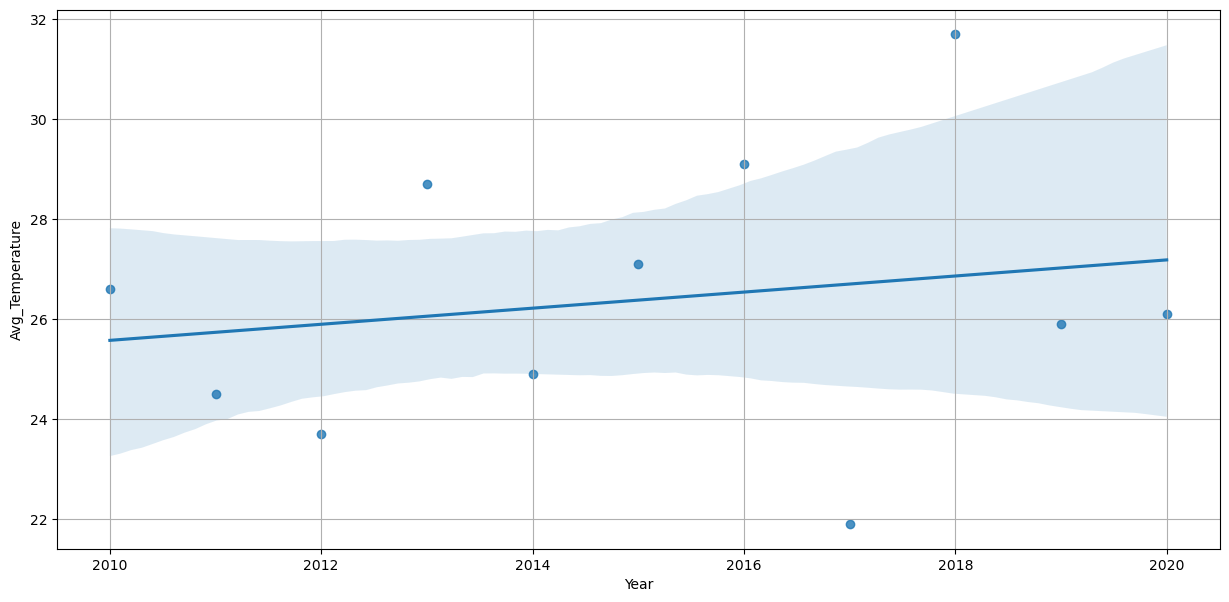

In [81]:
fig = plt.figure(figsize=(15, 7))
sns.regplot(x='연도', y='평균기온', data = temp0815)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Avg_Temperature")
plt.show()

C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  f.tight_layout()
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  f.tight_layout()
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  f.tight_layout()
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  f.tight_layout()
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  f.tight_layout()
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  f.tight_layout()
C:

<Figure size 1500x700 with 0 Axes>

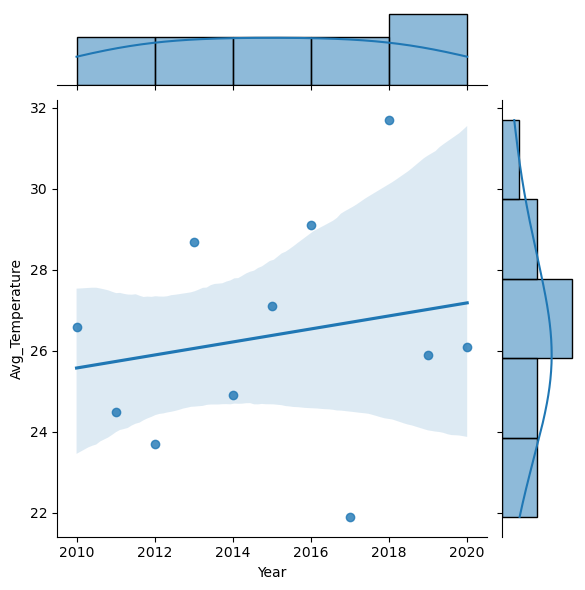

In [84]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='연도', y='평균기온', data = temp0815, kind="reg")
plt.xlabel("Year")
plt.ylabel("Avg_Temperature")
plt.show()

C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hjoon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hjoon\anaconda3\Lib\site-packages\

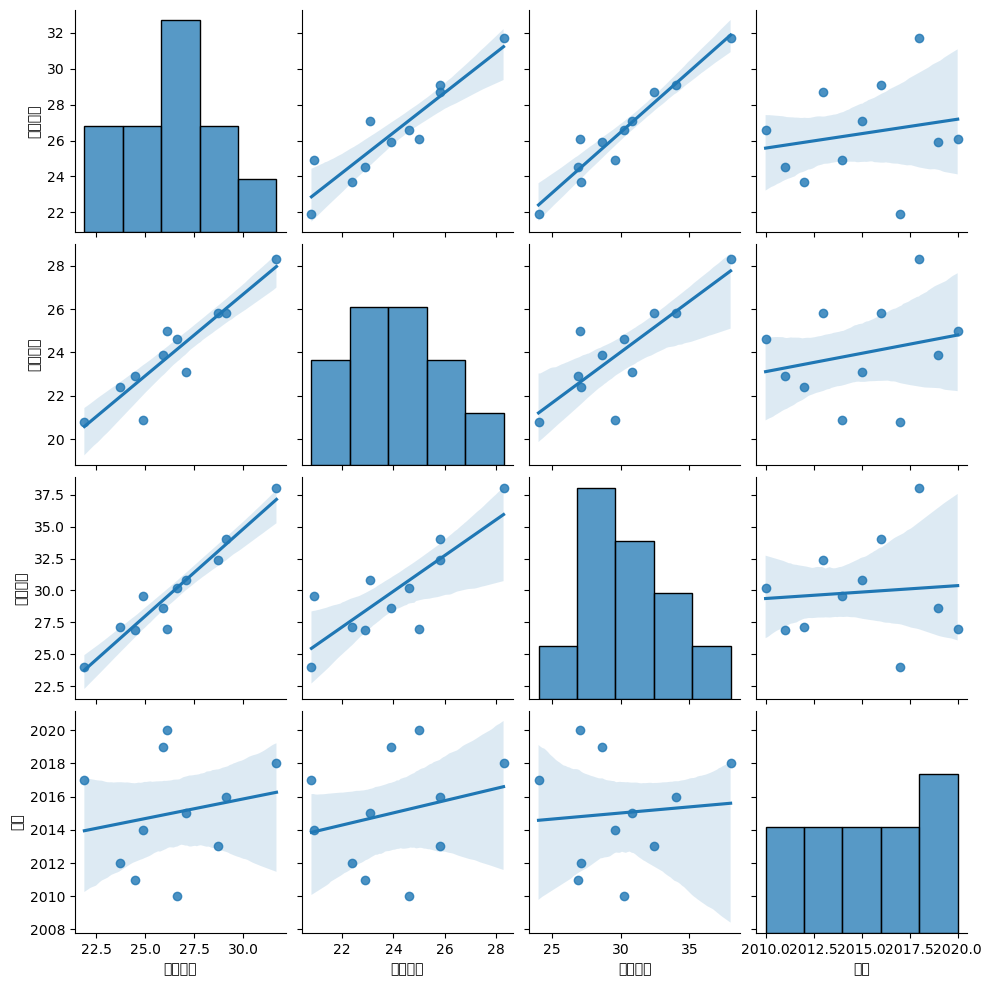

In [86]:
sns.pairplot(temp0815, kind='reg')
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=temp0815[['연도', '최저기온', '최고기온']]
y=temp0815['평균기온']

model.fit(X, y)
result = model.predict([[2022, 24, 33]])
print(result)

[28.08381871]


C:\Users\hjoon\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


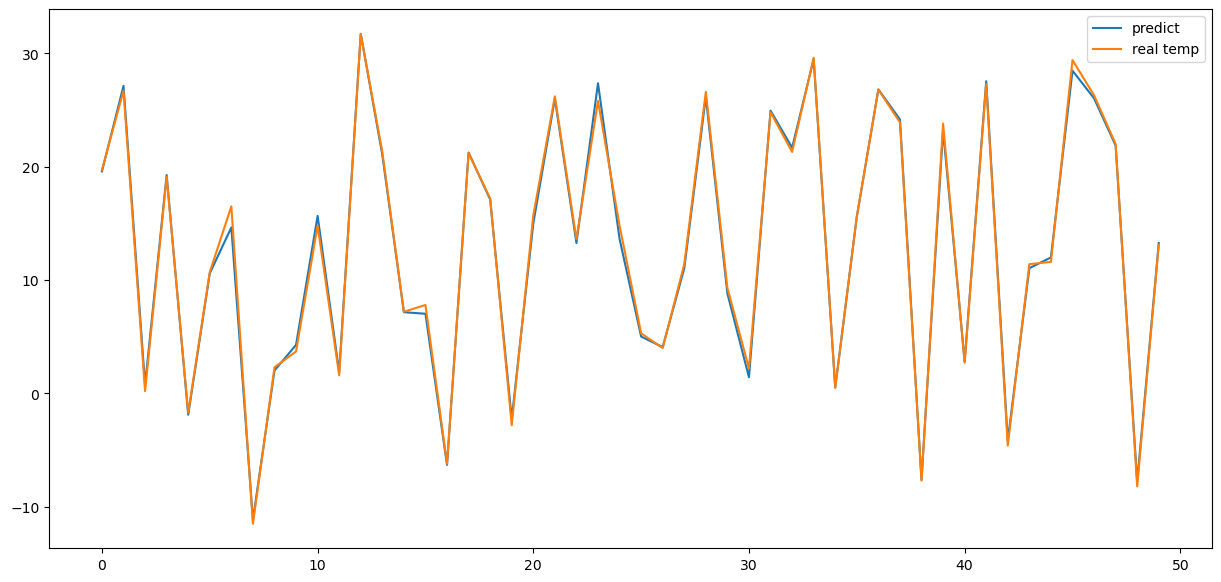

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.figure(figsize=(15, 7))

X = temp[['연도', '최저기온', '최고기온']]
y = temp['평균기온']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

plt.plot(model.predict(X_test[:50]), label="predict")
plt.plot(y_test[:50].values.reshape(-1, 1), label = 'real temp')
plt.legend()
plt.show()

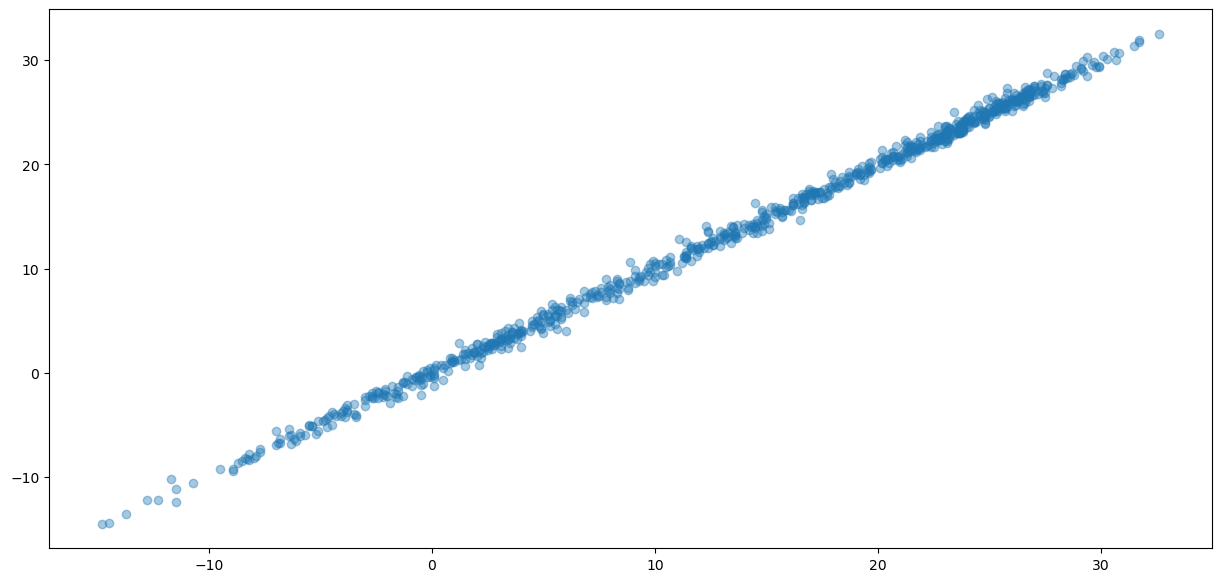

In [98]:
plt.figure(figsize=(15, 7))
y_predict = model.predict(X_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.show()

In [100]:
print(model.score(X_train, y_train))

0.9977115527939142
